## Decision Tree- Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1000)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

count          mean           std      min      25%      50%  \
Year           301.0   2013.627907      2.891554  2003.00   2012.0   2014.0   
Selling_Price  301.0      4.661296      5.082812     0.10      0.9      3.6   
Present_Price  301.0      7.628472      8.644115     0.32      1.2      6.4   
Kms_Driven     301.0  36947.205980  38886.883882   500.00  15000.0  32000.0   
Owner          301.0      0.043189      0.247915     0.00      0.0      0.0   

                   75%       max  
Year            2016.0    2018.0  
Selling_Price      6.0      35.0  
Present_Price      9.9      92.6  
Kms_Driven     48767.0  500000.0  
Owner              0.0       3.0

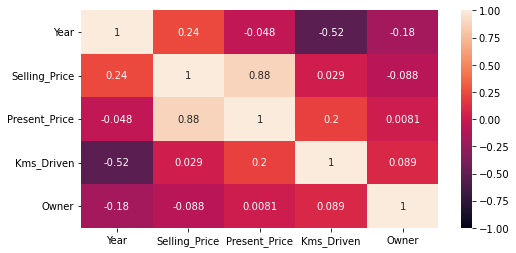

In [7]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [8]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [9]:
df["vehicle_age"]=2022-df.Year

# Datamızdaki araç üretim yılını age featurune dönüştürüyoruz.

In [10]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  vehicle_age  
0      Dealer       Manual      0            8  
1      Dealer       Manual      0            9  
2      Dealer       Manual      0            5  
3      Dealer       Manual      0           11  
4      Dealer       Manual      0            8

In [11]:
df.select_dtypes("object").head()

Car_Name Fuel_Type Seller_Type Transmission
0     ritz    Petrol      Dealer       Manual
1      sx4    Diesel      Dealer       Manual
2     ciaz    Petrol      Dealer       Manual
3  wagon r    Petrol      Dealer       Manual
4    swift    Diesel      Dealer       Manual

In [12]:
for i in df.select_dtypes("object"):

    print(i, len(df[i].value_counts()))

# kategorik featurların kaç unique gözlemden oluştuğu görüyoruz. car_name'in unique kategorik gözlem sayısı datamızdaki toplam 
# gözlem sayısına nazaran çok yüksek.

Car_Name 98
Fuel_Type 3
Seller_Type 2
Transmission 2


In [13]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [14]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

# 301 gözlemim olmasına rağmen car_name'de 98 tane unique araba/motor markası mevcut. Bu featura ordinal encoder uygulayarak
# numeric verilere döünüştürmek anlamlı bir hareket tarzı olmayacak. Çünkü DT modeli high cardinality categorical featureslara 
# (çok fazla unique kategorik gözlemler içeren featurlar) daha fazla önem yükleme eğilimindedir. Bu da bu featurların feature
# importanceda daha ön plana çıkmasına sebep olur. 

# Ayrıca  çoğu marka ve modelden 1-2 adet mevcut. Doğal olarak eğitime bir katkısı olmayacağından bu featura kaldırıyoruz.

# Araç üretim yılı olan Year featurını da Age featurına dönüştrdüğümüzden Year featurenıda car_name ile birlikte kaldırıyoruz.

In [15]:
df.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  vehicle_age  
0       Manual      0            8  
1       Manual      0            9  
2       Manual      0            5  
3       Manual      0           11  
4       Manual      0            8

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

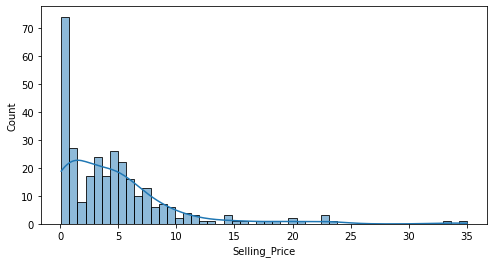

In [16]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

# tree based modeller outlierlara karşı çok robustdur(güçlüdür). Ancak küçük regression datalarında bu durum geçerli değildir.
# Küçük regression datalarında outlier dağerler düştüğü yapraklardaki ortalama fiyatları ciddi şekilde yükseltebiliğinden veya 
# azaltabildiğinden eğitim için yetersiz olan bu outlier gözlemleri düşürmek tree based modellerde önem arzediyor.

# Ancak her zaman olduğu gibi hem outlierlar ile hem de outlierları düşürerek skorları karşılaştırıp farklarını görmeliyiz.

<AxesSubplot:>

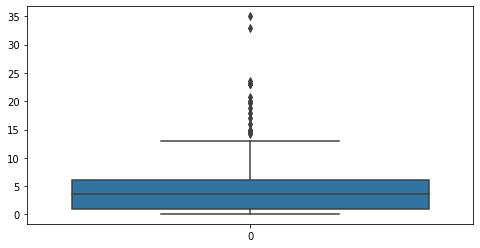

In [17]:
sns.boxplot(df.Selling_Price)

In [18]:
df2 = df.copy()

## Train test split

In [19]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modeling with Pipeline

In [21]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

# classification notebokunda yaptığımız işlemleri aynen tekrarlıyoruz.#

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# classification notebokunda yaptığımız işlemleri aynen tekrarlıyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [25]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [26]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# overfiting olduğuna dair insightımızı aldık. CV'da kesin kararımızı vereceğiz.

train      test
R2      1.0  0.940647
mae     0.0  0.676393
mse     0.0  1.593069
rmse    0.0  1.262168

In [27]:
# pd.options.display.float_format = '{:.3f}'.format
train_val(pipe_model, X_train, y_train, X_test, y_test)

train      test
R2      1.0  0.940647
mae     0.0  0.676393
mse     0.0  1.593069
rmse    0.0  1.262168

In [28]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# overfiting olduğunu teyit ettik

test_r2                              8.506384e-01
train_r2                             1.000000e+00
test_neg_mean_absolute_error        -8.914167e-01
train_neg_mean_absolute_error       -3.854941e-20
test_neg_mean_squared_error         -4.465591e+00
train_neg_mean_squared_error        -1.069961e-36
test_neg_root_mean_squared_error    -1.789890e+00
train_neg_root_mean_squared_error   -3.271026e-19
dtype: float64

## Removing Outliers

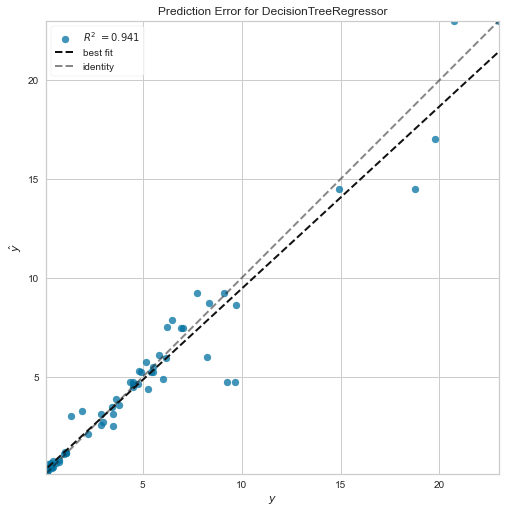

In [29]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# 10 dan büyük fiyatların tahminleri bozduğunu gördük.

In [30]:
len(df[df.Selling_Price > 10])

# datada 10 üzerinde 28 tane gözle var. Ve tüm datama oranı %9 olduğundan drop ediyorum.

28

In [31]:
28/301

0.09302325581395349

In [32]:
df_new = df[df.Selling_Price < 10]
df_new.head()

# 10'dan büyük fiyatları filtreledik

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  vehicle_age  
0       Manual      0            8  
1       Manual      0            9  
2       Manual      0            5  
3       Manual      0           11  
4       Manual      0            8

In [33]:
X = df_new.drop(columns="Selling_Price")
y = df_new.Selling_Price

# filtrelenmiş dataya göre tekrar X ve y'mizi tekrar atadık.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# filtrelenmiş datamızı train ve test setlerine ayırdık

In [35]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [36]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# filtreleme işlemi sonrası test datamızın skorları daha da iyileşti ancak overfiting hala giderilemedi.

train      test
R2    1.000000e+00  0.944856
mae   3.819575e-19  0.410000
mse   1.060145e-35  0.376744
rmse  3.255987e-18  0.613794

       train	test
R2	   1.000	0.941
mae	   0.000	0.676
mse	   0.000	1.593
rmse   0.000	1.262

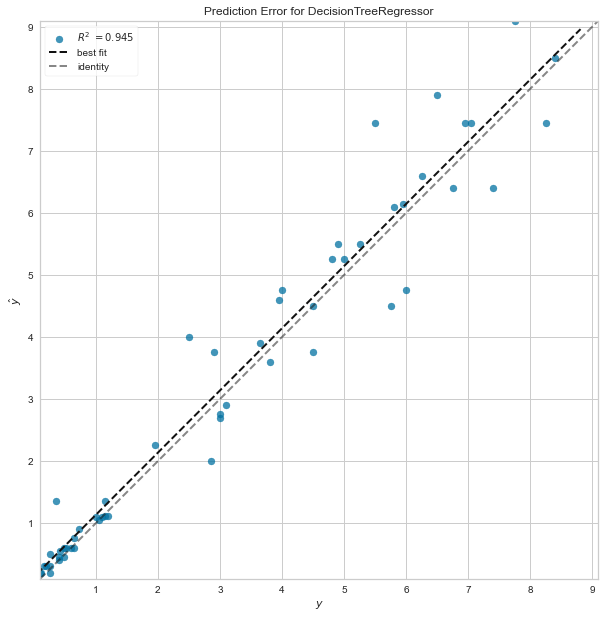

In [37]:
visualizer = RadViz(size=(720, 3000))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# Filtreleme sonrası skorların daha iyileştiğini burda da görüyoruz.

## Visualizing trees

In [38]:
from sklearn.tree import plot_tree

In [39]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()

new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

# pipeline içerisinde make_column_transform fonksiyonu kullanıldığından feature sırlamasının değiştiğini unutmuyoruz.
# ordinalencoder__ ve remainder__ ön eklerinden kurtuluyoruz.

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [40]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=new_features).head(1)

# make_column_transform sonrası yapısı değişen df'in son hali. Gördüğünüz gibi kategorik featurlar en öne takiben numaric
# featurlar gelmiş.

Fuel_Type  Seller_Type  Transmission  Present_Price  Kms_Driven  Owner  \
0        2.0          0.0           1.0           10.0     18828.0    0.0   

   vehicle_age  
0          7.0

In [41]:
X_train.head(1)

Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
269           10.0       18828    Petrol      Dealer       Manual      0   

     vehicle_age  
269            7

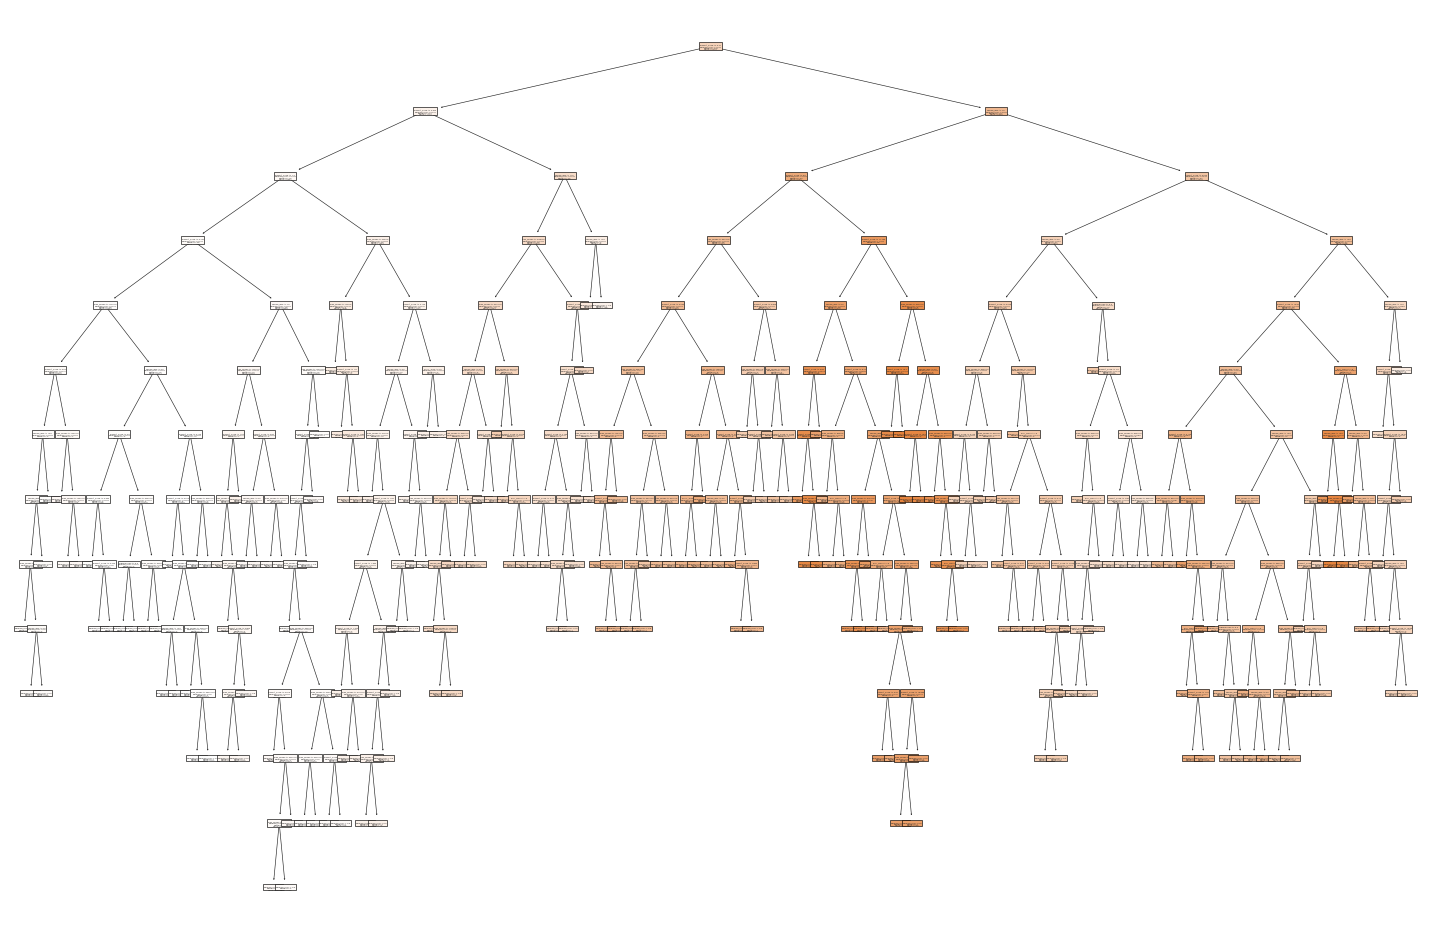

In [42]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(pipe_model["DT_model"], filled=True, feature_names=new_features); #feature_names=X.columns

# tree based modellerin regression problemlerinde dallanmalar classification problemlerine nazaran çok daha fazla olur.

In [43]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"],filled=True, feature_names=new_features, fontsize=8); #feature_names=X.columns

# Bu fonksiyon ile train ve test seti skorlarını karşılaştırıp ağacımızı görselleştiriyoruz.



         train      test
R2    0.886997  0.889648
mae   0.577921  0.574322
mse   0.815377  0.753927
rmse  0.902982  0.868289




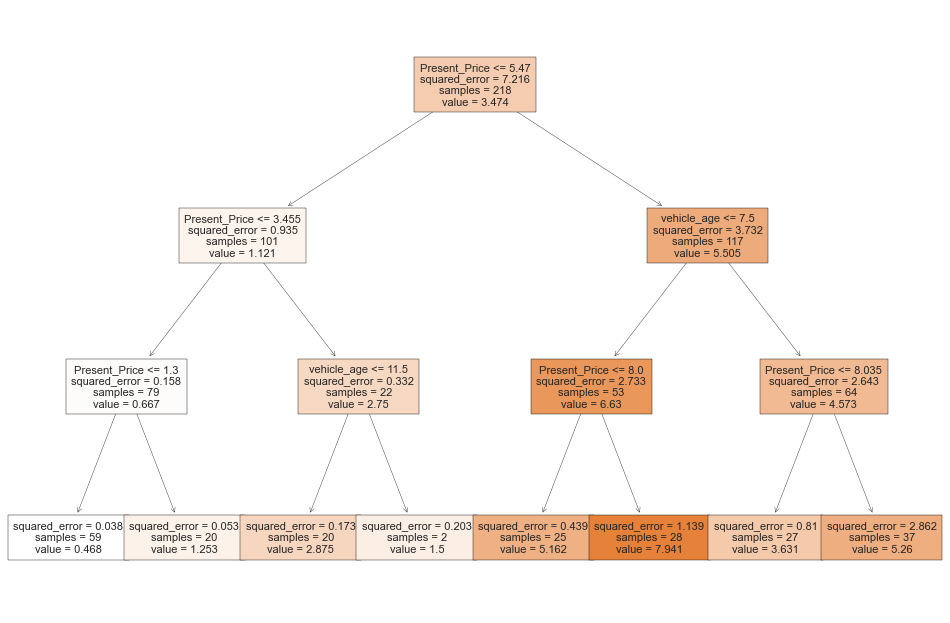

In [44]:
operations = [("OrdinalEncoder", column_trans), 
              ("DT_model", DecisionTreeRegressor(criterion='squared_error',
                                                 max_depth=3,
                                                 random_state=101))]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

# clasificationdan tek farkı criterion='squared_error'dür. Hatırlarsanız clasification da bu hyper_parametre gini veya entropy
# oluyordu. Regressionda criterion= "squared_error", "friedman_mse", "absolute_error", "poisson" değerlerinden birini 
# alabiliyor. Ama genellikle model en iyi sonuçları "squared_error"da aldığı için default olarak bu değer kullanılıyor.

# squared error, mean squared error'ü temsil ediyor.Bir yaprağın errorünün 0 olması o yaparağa düşen tüm arabaların aynı fiyatta
# olduğunu gösterirken 0'a yakın bir değer olması fiyatları biribirine çok yakın arabalar olduğunu gösterir Yüksek bir error 
# değeri ise o yaprağa fiyatları biribirinden çok alakasız arabaların düştüğünü gösterir. 

# sampales ilgili yapraktaki toplam gözlem sayısını gösterir.

# value ilgili yapraktaki gözlemlerin ortalama fiyatını gösterir.

# predict ettiğimiz bir gözle hangi yaprağa düşerse o yapraktaki value değeri arabanın model tarafından tahmin edilen değeri
# olur.

## GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

In [47]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "DT_model__max_depth": [2, 3],
              "DT_model__min_samples_leaf": [1, 2, 3, 4],
              "DT_model__min_samples_split": [2, 3, 4],
              "DT_model__max_features":[4, 5, 6, None]}

In [48]:
grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [49]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__criterion': ['squared_error',
                                                 'friedman_mse',
                                                 'absolute_error', 'poisson'],
                         'DT_model__max_depth': [2, 3],
                         'DT_model__max_features': [4, 5, 6, None],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4],
                         'DT_model__min_samples_split': [2, 3, 4],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [50]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

In [51]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]
# overfitingin tamamen gidirildiğini gördük.

mean_test_score    -0.935087
mean_train_score   -0.900378
Name: 552, dtype: object

In [52]:
train_val(grid_model, X_train, y_train, X_test, y_test)

# test datası skorları ile CV'dan aldığımız validation seti skorlarının tutarlı olduğunu gördük.

train      test
R2    0.879311  0.891632
mae   0.588211  0.593455
mse   0.870834  0.740371
rmse  0.933185  0.860448

In [53]:
y.mean()

3.4022710622710615

In [54]:
0.86/3.4

# test datası rmse göre model ortalama %25 hata yapıyor.

0.2529411764705882

In [55]:
0.935/3.4

# CV valiadation setinin ortalama skorlarına göre ortalama %27 hata yapıyor.

0.275

In [56]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), 
              ("DT_model", DecisionTreeRegressor(max_depth=3,
                                                 criterion='absolute_error',
                                                 random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.iloc[:,2:]

# tüm metricleri görmek içinde CV yapabiliriz.
# CVdaki tüm iterasyonlara baktığımızda bazı skorların çok farklı olduğunu görebiliyoruz. Çok küçük datalarda beklenen
# bir durumdur.

test_r2  train_r2  test_neg_mean_absolute_error  \
1   0.911631  0.886557                     -0.545000   
2   0.906127  0.891609                     -0.499773   
3   0.711614  0.901378                     -0.997955   
4   0.958482  0.881956                     -0.369545   
5   0.925885  0.887050                     -0.545909   
6   0.877081  0.892273                     -0.779545   
7   0.905806  0.875377                     -0.561591   
8   0.838110  0.883364                     -0.702045   
9   0.856118  0.888484                     -0.673333   
10  0.788449  0.887161                     -0.719524   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -0.571071                    -0.486459   
2                       -0.555459                    -0.544994   
3                       -0.524337                    -1.550633   
4                       -0.565612                    -0.307086   
5                       -0.548367                    -0.518507   
6                       -0.523724                    -1.101368   
7                       -0.595357                    -0.630410   
8                       -0.582296                    -1.121322   
9                       -0.562284                    -1.512617   
10                      -0.582234                    -1.596290   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                      -0.840099                         -0.697466   
2                      -0.797669                         -0.738237   
3                      -0.729916                         -1.245244   
4                      -0.849227                         -0.554154   
5                      -0.817766                         -0.720074   
6                      -0.756213                         -1.049461   
7                      -0.905947                         -0.793984   
8                      -0.843706                         -1.058925   
9                      -0.765171                         -1.229885   
10                     -0.808567                         -1.263444   

    train_neg_root_mean_squared_error  
1                           -0.916569  
2                           -0.893123  
3                           -0.854351  
4                           -0.921535  
5                           -0.904304  
6                           -0.869605  
7                           -0.951813  
8                           -0.918535  
9                           -0.874740  
10                          -0.899204

In [57]:
df_scores.mean()[2:]

# ortalamalarına göre 

test_r2                              0.867930
train_r2                             0.887521
test_neg_mean_absolute_error        -0.639422
train_neg_mean_absolute_error       -0.561074
test_neg_mean_squared_error         -0.936969
train_neg_mean_squared_error        -0.811428
test_neg_root_mean_squared_error    -0.935087
train_neg_root_mean_squared_error   -0.900378
dtype: float64

In [58]:
train_val(grid_model, X_train, y_train, X_test, y_test)

train      test
R2    0.879311  0.891632
mae   0.588211  0.593455
mse   0.870834  0.740371
rmse  0.933185  0.860448

## Feature İmportance

In [59]:
operations = [("OrdinalEncoder", column_trans), 
              ("DT_model", DecisionTreeRegressor(max_depth=3, 
                                                 criterion='absolute_error',
                                                 random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

# feature importance için gridsearch sonrası bulduğumuz en iyi hyper parametreleri kullanmamız gerektiğini unutmuyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

In [60]:
X_train.head(1)

# pipeline içerisinde make_colum_transform kullanıldığından burdaki feture isimlerini kullanmıyoruz.

Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
269           10.0       18828    Petrol      Dealer       Manual      0   

     vehicle_age  
269            7

In [61]:
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [62]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=new_features).head()

# make_colum_transform sonrası yeni df'in feature isimlerini sırasıyla gösteren new_features listesini kullanıyoruz. 

Fuel_Type  Seller_Type  Transmission  Present_Price  Kms_Driven  Owner  \
0        2.0          0.0           1.0          10.00     18828.0    0.0   
1        2.0          1.0           1.0           1.05    213000.0    0.0   
2        2.0          0.0           1.0           5.97      5600.0    0.0   
3        2.0          0.0           1.0           9.40     60241.0    0.0   
4        2.0          0.0           1.0           4.43     28282.0    0.0   

   vehicle_age  
0          7.0  
1         12.0  
2          6.0  
3          9.0  
4          7.0

In [63]:
df_f_i = pd.DataFrame(data = pipe_model["DT_model"].feature_importances_, 
                      index=new_features, 
                      columns=["Feature Importance"])

df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)

df_f_i

# Gördüğünüz gibi DT 2 feature hariç diğer featurlardan bir insight çıkaramamış. Çünkü DT herzaman en iyi featurlara yoğunlaşır.

Feature Importance
Present_Price            0.828095
vehicle_age              0.171905
Fuel_Type                0.000000
Seller_Type              0.000000
Transmission             0.000000
Kms_Driven               0.000000
Owner                    0.000000

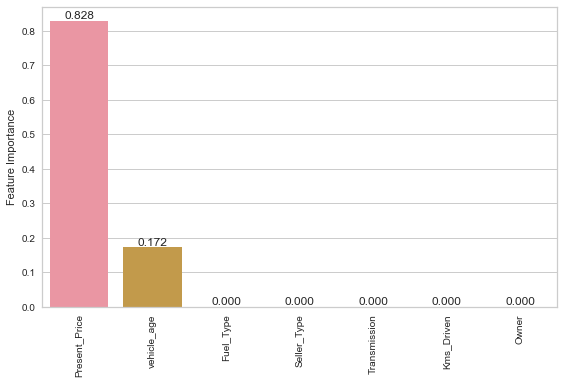

In [64]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

# feature importance değerlerimizi barplot ile görselleştiriyoruz.

## Compore real and predicted result

In [65]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

# modelin tahminleri başarılı bir şekilde yapıp yapamadığı görmek için gerçek, tahmin edilen değerler ile residulları
# karşılaştırıyoruz.

In [66]:
comp_sample = compare.sample(20)
comp_sample

Actual  Pred  Residual
213    2.90  2.95     -0.05
186    0.25  0.48     -0.23
193    0.20  0.48     -0.28
271    3.00  4.75     -1.75
6      6.75  7.50     -0.75
251    5.00  4.75      0.25
120    1.05  0.48      0.57
244    5.95  4.75      1.20
243    6.25  4.75      1.50
123    1.00  1.20     -0.20
266    3.65  4.75     -1.10
265    6.50  7.50     -1.00
197    0.16  0.48     -0.32
187    0.25  0.48     -0.23
142    0.60  0.48      0.12
172    0.40  0.48     -0.08
114    1.15  1.20     -0.05
76     5.50  4.75      0.75
221    4.50  2.95      1.55
173    0.40  0.48     -0.08

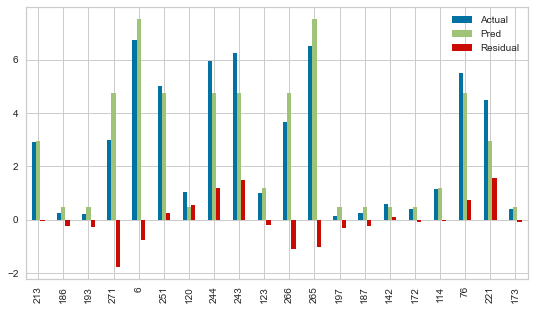

In [67]:
comp_sample.plot(kind='bar',figsize=(9,5))
plt.show()

## Final Model

In [68]:
X=df_new.drop("Selling_Price", axis=1)
y=df_new.Selling_Price

In [69]:
from sklearn.pipeline import Pipeline

operations = [("Ordinalcoder", column_trans), 
              ("DT_model", DecisionTreeRegressor(max_depth=3, 
                                                 criterion='absolute_error', 
                                                 random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

# final modelimizi en iyi hyper parametrelerle tüm data için yenden kuruyoruz.

Pipeline(steps=[('Ordinalcoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

## Prediction

In [70]:
X.describe()

Present_Price     Kms_Driven       Owner  vehicle_age
count     273.000000     273.000000  273.000000   273.000000
mean        5.879267   36516.941392    0.047619     8.527473
std         4.955093   39529.115504    0.259956     2.943115
min         0.320000     500.000000    0.000000     4.000000
25%         0.990000   15001.000000    0.000000     6.000000
50%         5.700000   32000.000000    0.000000     8.000000
75%         8.920000   48000.000000    0.000000    10.000000
max        23.730000  500000.000000    3.000000    19.000000

In [71]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [72]:
df_samples = pd.DataFrame(samples)
df_samples

Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  \
0            7.0       25000    Petrol      Dealer       Manual      0   
1            9.5       44000    Diesel  Individual    Automatic      1   

   vehicle_age  
0            1  
1            9

In [73]:
pipe_model.predict(df_samples)

array([4.65, 6.9 ])